# Otimização Heurística - Trabalho individual I

## Exercicio A)
- - -

<div style="text-align:center">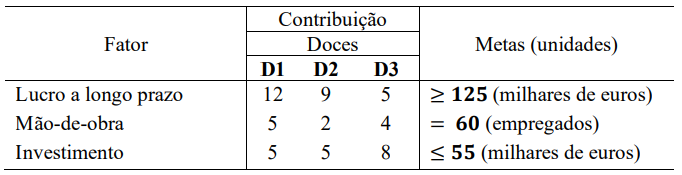</div>

$$\text{Lucro a longo prazo:} \ 12D_1+9D_2+5D_3+d_1^-\geq125\ \left(Milhares\ de\ euros\right) \\
\text{Mão de obra:} \ 5D_1+2D_2+4D_3+d_2^--d_2^+=60\ \left(empregados\right) \\
\text{Investimento:} \ 5D_1+5D_2+8D_3-d_3^+\le55\ \left(Milhares\ de\ euros\right) \\
D_1\le6\ (Restrição D1) \\
D_2\geq2\ (Restrição D2) \\
D_3\geq1\ (Restrição D3) \\
D_1, D_2, D_3, d_1^-, d_2^-, d_2^+, d_3^+ \geq 0
$$

## Exercicio B)
- - -

In [10]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm1 = LpVariable(name=f"dm1", lowBound=0)
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)

# Add the constraints to the model
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm1 >= 125, "Lucro a longo prazo, milhares de euros")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [5, 10/5, 4/5, 5]
obj_func = (peso[0]/vam[0]) * dm1 + (peso[1]/vam[1]) * dm2 + (peso[2]/vam[2]) * dM2 + (peso[3]/vam[3]) * dM3  
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.013333333333333334*dM2 + 0.09090909090909091*dM3 + 0.04*dm1 + 0.03333333333333333*dm2 + 0.0
SUBJECT TO
Lucro_a_longo_prazo,_milhares_de_euros: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dM2 Continuous
dM3 Continuous
dm1 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [11]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm1}: {dm1.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 1.3359999999999999
x1: 6.0
x2: 3.4
x3: 1.0
dm1: 17.4
dm2: 19.2
dM2: 0.0
dM3: 0.0
Lucro_a_longo_prazo,_milhares_de_euros: -3.552713678800501e-15
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 0.0
Restricao_D1: 0.0
Restricao_D2: 1.4
Restricao_D3: 0.0


## Exercicio C)

### Refazer o modelo mínimo dos desvios percentuais, com um peso associado diferente

Nesta fase, serão feitos 2 modelos diferentes que possuem de diferente apenas os pesos

#### Modelo Extra 1

**Novos Pesos**

  \begin{cases}
  P^-_1, & \text{Penalização de 3 pontos por cada milhar de euros abaixo do nível de aspiração do lucro;}\\
  P^-_2, & \text{Penalização de } 1 \ \text{pontos por cada trabalhador abaixo do valor alvo;}\\ 
  P^+_2, & \text{Penalização de } 1 \ \text{pontos por cada trabalhador abaixo do valor alvo;}\\
  P^+_3, & \text{Penalização de 2 pontos por cada milhar de euros acima do nível de aspiração do investimento de capital.}\\
  \end{cases}

In [42]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm1 = LpVariable(name=f"dm1", lowBound=0)
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)

# Add the constraints to the model
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm1 >= 125, "Lucro a longo prazo, milhares de euros")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [3, 1, 1, 2]
obj_func = (peso[0]/vam[0]) * dm1 + (peso[1]/vam[1]) * dm2 + (peso[2]/vam[2]) * dM2 + (peso[3]/vam[3]) * dM3  
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.016666666666666666*dM2 + 0.03636363636363636*dM3 + 0.024*dm1 + 0.016666666666666666*dm2 + 0.0
SUBJECT TO
Lucro_a_longo_prazo,_milhares_de_euros: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dM2 Continuous
dM3 Continuous
dm1 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [44]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm1}: {dm1.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}")

objective: 0.6070702727272728
x1: 6.0
x2: 5.33333
x3: 1.0
dm1: 0.0
dm2: 15.3333
dM2: 0.0
dM3: 9.66667
Lucro_a_longo_prazo,_milhares_de_euros: -2.9999999995311555e-05
Mao_de_obra: -4.000000000026205e-05
Investimento,_milhares_de_euros: -1.9999999999242846e-05
Restricao_D1: 0.0
Restricao_D2: 3.33333
Restricao_D3: 0.0


#### Modelo Extra 2

**Novos Pesos**

  \begin{cases}
  P^-_1, & \text{Penalização de 1 ponto por cada milhar de euros abaixo do nível de aspiração do lucro;}\\
  P^-_2, & \text{Penalização de } 2 \ \text{pontos por cada trabalhador abaixo do valor alvo;}\\ 
  P^+_2, & \text{Penalização de } 2 \ \text{pontos por cada trabalhador abaixo do valor alvo;}\\
  P^+_3, & \text{Penalização de 1 ponto por cada milhar de euros acima do nível de aspiração do investimento de capital.}\\
  \end{cases}

In [12]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm1 = LpVariable(name=f"dm1", lowBound=0)
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)

# Add the constraints to the model
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm1 >= 125, "Lucro a longo prazo, milhares de euros")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [1, 2, 2, 1]
obj_func = (peso[0]/vam[0]) * dm1 + (peso[1]/vam[1]) * dm2 + (peso[2]/vam[2]) * dM2 + (peso[3]/vam[3]) * dM3  
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.03333333333333333*dM2 + 0.01818181818181818*dM3 + 0.008*dm1 + 0.03333333333333333*dm2 + 0.0
SUBJECT TO
Lucro_a_longo_prazo,_milhares_de_euros: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dM2 Continuous
dM3 Continuous
dm1 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [13]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm1}: {dm1.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}")

objective: 0.67972
x1: 6.0
x2: 2.38462
x3: 6.30769
dm1: 0.0
dm2: 0.0
dM2: 0.0
dM3: 37.3846
Lucro_a_longo_prazo,_milhares_de_euros: 2.999999999886427e-05
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 1.9999999999242846e-05
Restricao_D1: 0.0
Restricao_D2: 0.38461999999999996
Restricao_D3: 5.30769


### Modelo Minimax
- - -

$$\text{Min Max Z}= \{5 \times \frac{d_1^-}{125} + \frac{10}{5} \times \frac{d_2^-}{60} + \frac{4}{5} \times \frac{d_2^+}{60} + 5 \times \frac{d_3^+}{55} \}$$

**Restrições adicionais**

$$5\times\frac{d_1^-}{125}\ \le\ Q$$
$$\frac{10}{5}\times\frac{d_2^-}{60}\le Q$$
$$\frac{4}{5}\times\frac{d_2^+}{60}\le Q$$
$$5\times\frac{d_3^+}{55}\ \le\ Q$$

In [1]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)
vam = [125, 60, 60, 55]
peso = [5, 10/5, 4/5, 5]
#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm1 = LpVariable(name=f"dm1", lowBound=0)
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)
Q = LpVariable(name=f"Q", lowBound=0)

# Add the constraints to the model
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm1 >= 125, "Lucro a longo prazo, milhares de euros")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")
model += ((peso[0]/vam[0]) * dm1 <= Q, "desvio_inf_meta_1")
model += ((peso[1]/vam[1]) * dm2 <= Q, "desvio_inf_meta_2")
model += ((peso[2]/vam[2]) * dM2 <= Q, "desvio_sup_meta_2")
model += ((peso[3]/vam[3]) * dM3  <= Q, "desvio_sup_meta_3")

# Add the objective function to the model

obj_func = Q
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
1*Q + 0
SUBJECT TO
Lucro_a_longo_prazo,_milhares_de_euros: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

desvio_inf_meta_1: - Q + 0.04 dm1 <= 0

desvio_inf_meta_2: - Q + 0.0333333333333 dm2 <= 0

desvio_sup_meta_2: - Q + 0.0133333333333 dM2 <= 0

desvio_sup_meta_3: - Q + 0.0909090909091 dM3 <= 0

VARIABLES
Q Continuous
dM2 Continuous
dM3 Continuous
dm1 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [3]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm1}: {dm1.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.541203
x1: 6.0
x2: 3.42539
x3: 1.72829
dm1: 13.5301
dm2: 16.2361
dM2: 0.0
dM3: 5.95323
Lucro_a_longo_prazo,_milhares_de_euros: 6.000000000128125e-05
Mao_de_obra: 4.0000000002038405e-05
Investimento,_milhares_de_euros: 4.0000000002038405e-05
Restricao_D1: 0.0
Restricao_D2: 1.4253900000000002
Restricao_D3: 0.7282900000000001
desvio_inf_meta_1: 1.0000000000287557e-06
desvio_inf_meta_2: 3.33333333379926e-07
desvio_sup_meta_2: -0.541203
desvio_sup_meta_3: -2.72727272765394e-07


## Exercicio D)
- - -

In [21]:
from IPython.display import display_markdown

Solucao1 = [6, 3.4, 1]
Solucao2 = [6, 16/3, 1]
Solucao3 = [6, 2.38462, 6.30769]
Solucao4 = [6, 3.42539, 1.72829]

display_markdown(f''' 
<center>

| **Soluções\Metas** | **Meta1: Lucro** | **Meta2: Nº Trabalhadores** | **Meta3: Investimento** |
|------------------|-------|------|------|
|**Modelo 1**| {12*Solucao1[0]+9*Solucao1[1]+5*Solucao1[2]} | {5*Solucao1[0]+2*Solucao1[1]+4*Solucao1[2]} | {5*Solucao1[0]+5*Solucao1[1]+8*Solucao1[2]} |
|Sol. Ref. 1|D1={Solucao1[0]}|D2={Solucao1[1]}|D3={Solucao1[2]}|
|**Modelo Extra 1**| {12*Solucao2[0]+9*Solucao2[1]+5*Solucao2[2]} | {5*Solucao2[0]+2*Solucao2[1]+4*Solucao2[2]} | {5*Solucao2[0]+5*Solucao2[1]+8*Solucao2[2]} |
|Sol. Ref. 2|D1={Solucao2[0]}|D2={Solucao2[1]}|D3={Solucao2[2]}|
|**Modelo Extra 2**| {12*Solucao3[0]+9*Solucao3[1]+5*Solucao3[2]} | {5*Solucao3[0]+2*Solucao3[1]+4*Solucao3[2]} | {5*Solucao3[0]+5*Solucao3[1]+8*Solucao3[2]} |
|Sol. Ref. 3|D1={Solucao3[0]}|D2={Solucao3[1]}|D3={Solucao3[2]}|
|**Modelo MiniMax**| {12*Solucao4[0]+9*Solucao4[1]+5*Solucao4[2]} | {5*Solucao4[0]+2*Solucao4[1]+4*Solucao4[2]} | {5*Solucao4[0]+5*Solucao4[1]+8*Solucao4[2]} |
|Sol. Ref. 3|D1={Solucao4[0]}|D2={Solucao4[1]}|D3={Solucao4[2]}|

</center>
''', raw=True)

 
<center>

| **Soluções\Metas** | **Meta1: Lucro** | **Meta2: Nº Trabalhadores** | **Meta3: Investimento** |
|------------------|-------|------|------|
|**Modelo 1**| 107.6 | 40.8 | 55.0 |
|Sol. Ref. 1|D1=6|D2=3.4|D3=1|
|**Modelo Extra 1**| 125.0 | 44.666666666666664 | 64.66666666666666 |
|Sol. Ref. 2|D1=6|D2=5.333333333333333|D3=1|
|**Modelo Extra 2**| 125.00003 | 60.0 | 92.38462 |
|Sol. Ref. 3|D1=6|D2=2.38462|D3=6.30769|
|**Modelo MiniMax**| 111.46996 | 43.76394 | 60.95327 |
|Sol. Ref. 3|D1=6|D2=3.42539|D3=1.72829|

</center>


## Exercicio E) - Abordagem Preemptiva
- - -

<div style="text-align:center">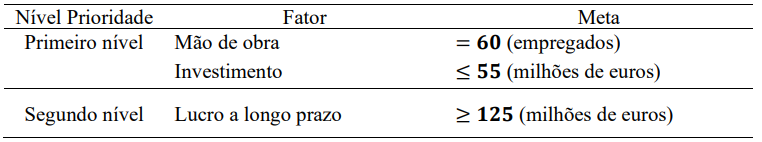</div>

### Modelo Original

Neste caso, a função objetivo seria dada por:

$$ \text{Lex min Z} = \{ \frac{10}{5}\times\frac{d_2^-}{60}+\frac{4}{5}\times\frac{d_2^+}{60}+5\times\frac{d_3^+}{55}, \ 5\times\frac{d_1^-}{125} \} $$

#### Nível Prioritário
- - -

**Variáveis:**
$$D_i - \text{produção em toneladas do Doce i} \\
i = 1,2,3$$

**Condições Prioritárias:**
$$5D_1 + 2D_2 + 4D_3 = 60 \ \text{[Mão de Obra]} \\
5D_1 + 5D_2 + 8D_3 \leq 55 \ \text{Milhares de euros} \ \text{[Investimento]}$$

In [7]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)

# Add the constraints to the model
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [5, 10/5, 4/5, 5]
obj_func = (peso[1]/vam[1]) * dm2 + (peso[2]/vam[2]) * dM2 + (peso[3]/vam[3]) * dM3  
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.013333333333333334*dM2 + 0.09090909090909091*dM3 + 0.03333333333333333*dm2 + 0.0
SUBJECT TO
Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dM2 Continuous
dM3 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [8]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.6166666666666667
x1: 6.0
x2: 2.0
x3: 1.875
dm2: 18.5
dM2: 0.0
dM3: 0.0
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 0.0
Restricao_D1: 0.0
Restricao_D2: 0.0
Restricao_D3: 0.875


Analisando os resultados do Output em cima, é notótrio que o $d_2^- = 18.5 \neq 0$, logo não é possivel alcançar o nível de aspiração da mão de obra.
Deste modo, é necessário atualizar o nível da mão de obra.
Para isso, iremos fazer o seguinte cálculo:
$$60 - d_2^- = 60 - 18.5 = \lfloor 41.5 \rfloor = 41 \ \text{(Ter em conta que o arredondamento será feito para baixo, pois, não existe meio trabalhador)}$$

##### Atualização das metas

**Novas Condições Prioritárias:**
$$5D_1 + 2D_2 + 4D_3 = 41 \ \text{[Mão de Obra]} \\
5D_1 + 5D_2 + 8D_3 \leq 55 \ \text{Milhares de euros} \ \text{[Investimento]}$$

In [5]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)

# Add the constraints to the model
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 41, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [5, 10/5, 4/5, 5]
obj_func = (peso[1]/vam[1]) * dm2 + (peso[2]/vam[2]) * dM2 + (peso[3]/vam[3]) * dM3  
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.013333333333333334*dM2 + 0.09090909090909091*dM3 + 0.03333333333333333*dm2 + 0.0
SUBJECT TO
Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 41

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dM2 Continuous
dM3 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [6]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.0
x1: 6.0
x2: 2.0
x3: 1.75
dm2: 0.0
dM2: 0.0
dM3: 0.0
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: -1.0
Restricao_D1: 0.0
Restricao_D2: 0.0
Restricao_D3: 0.75


Visualizando os resultados em cima, é possivel concluir que $Z^* = d^-_2 = d^+_2 = d^+_3 = 0$, logo, é possível alcançar o nível de aspiração tanto da **mão de obra** como do **Investimento**.

##### Solução ótima

$$D_1=6 \\
D_2=2 \\
D_3=1.75$$

#### Nível Secundário
- - -

**Condição Secundária:**
$$12D_1 + 9D_2 + 5D_3 \geq 125 \ \text{[Lucro a longo Prazo]}$$

In [19]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm1 = LpVariable(name=f"dm1", lowBound=0)

# Add the constraints to the model
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm1 >= 125, "Lucro a longo prazo, milhares de euros")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] == 41, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [5, 10/5, 4/5, 5]
obj_func = (peso[0]/vam[0]) * dm1 
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.04*dm1 + 0.0
SUBJECT TO
Lucro_a_longo_prazo,_milhares_de_euros: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Mao_de_obra: 5 x1 + 2 x2 + 4 x3 = 41

Investimento,_milhares_de_euros: 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dm1 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [20]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm1}: {dm1.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.79
x1: 6.0
x2: 3.0
x3: 1.25
dm1: 19.75
Lucro_a_longo_prazo,_milhares_de_euros: 0.0
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 0.0
Restricao_D1: 0.0
Restricao_D2: 1.0
Restricao_D3: 0.25


Visualizando os resultados em cima, é possivel concluir que o $d_1^- = 19.75 \neq 0$, logo não é possivel alcançar o nível de aspiração do Lucro a Longo Prazo.
Deste modo, é necessário atualizar o nível do Lucro a Longo Prazo.
Para isso, iremos fazer o seguinte cálculo:
$$125 - d_1^- = 125 - 19.75 = 105.25 \ \text{(Neste caso, não é necessário arrendondar para baixo, pois, o valor 106.25 milhares de euros existe e faz sentido)}$$

##### Atualização das metas

**Nova Condição Secundária:**
$$12D_1 + 9D_2 + 5D_3 \geq 105.25 \ \text{[Lucro a longo Prazo]}$$

In [24]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm1 = LpVariable(name=f"dm1", lowBound=0)

# Add the constraints to the model
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm1 >= 105.25, "Lucro a longo prazo, milhares de euros")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] == 41, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [5, 10/5, 4/5, 5]
obj_func = (peso[0]/vam[0]) * dm1 
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.04*dm1 + 0.0
SUBJECT TO
Lucro_a_longo_prazo,_milhares_de_euros: dm1 + 12 x1 + 9 x2 + 5 x3 >= 105.25

Mao_de_obra: 5 x1 + 2 x2 + 4 x3 = 41

Investimento,_milhares_de_euros: 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dm1 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [25]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm1}: {dm1.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.0
x1: 6.0
x2: 3.0
x3: 1.25
dm1: 0.0
Lucro_a_longo_prazo,_milhares_de_euros: 0.0
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 0.0
Restricao_D1: 0.0
Restricao_D2: 1.0
Restricao_D3: 0.25


Visualizando os resultados em cima, é possivel concluir que $Z^* = d^-_1 = 0$, logo, é possível alcançar o nível de aspiração do **Lucro a Longo Prazo**.

##### Solução Ótima

### Modelo Extra

#### Nível Prioritário

In [42]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)

# Add the constraints to the model
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 55, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [1, 3, 3, 1]
obj_func = (peso[1]/vam[1]) * dm2 + (peso[2]/vam[2]) * dM2 + (peso[3]/vam[3]) * dM3  
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.05*dM2 + 0.01818181818181818*dM3 + 0.05*dm2 + 0.0
SUBJECT TO
Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 55

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dM2 Continuous
dM3 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [43]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.6727272727272727
x1: 6.0
x2: 2.0
x3: 6.5
dm2: 0.0
dM2: 0.0
dM3: 37.0
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 0.0
Restricao_D1: 0.0
Restricao_D2: 0.0
Restricao_D3: 5.5


##### Atualização das metas

In [36]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm2 = LpVariable(name=f"dm2", lowBound=0)
dM2 = LpVariable(name=f"dM2", lowBound=0)
dM3 = LpVariable(name=f"dM3", lowBound=0)

# Add the constraints to the model
model += (5 * x[1] + 2 * x[2] + 4 * x[3] + dm2 - dM2 == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] - dM3 <= 92, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [1, 3, 3, 1]
obj_func = (peso[1]/vam[1]) * dm2 + (peso[2]/vam[2]) * dM2 + (peso[3]/vam[3]) * dM3  
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.05*dM2 + 0.01818181818181818*dM3 + 0.05*dm2 + 0.0
SUBJECT TO
Mao_de_obra: - dM2 + dm2 + 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: - dM3 + 5 x1 + 5 x2 + 8 x3 <= 92

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dM2 Continuous
dM3 Continuous
dm2 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [37]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.0
x1: 6.0
x2: 2.0
x3: 6.5
dm2: 0.0
dM2: 0.0
dM3: 0.0
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 0.0
Restricao_D1: 0.0
Restricao_D2: 0.0
Restricao_D3: 5.5


#### Nível Secundário

In [38]:
import pandas as pd
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
#
# Nota: (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1)
#
# Create the model
model = LpProblem(name="TrabalhoIndividual", sense=LpMinimize)

#
# Initialize the decision variables
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}
dm1 = LpVariable(name=f"dm1", lowBound=0)

# Add the constraints to the model
model += (12 * x[1] + 9 * x[2] + 5 * x[3] + dm1 >= 125, "Lucro a longo prazo, milhares de euros")
model += (5 * x[1] + 2 * x[2] + 4 * x[3] == 60, "Mao de obra")
model += (5 * x[1] + 5 * x[2] + 8 * x[3] <= 92, "Investimento, milhares de euros")
model += (x[1] <= 6, "Restricao D1")
model += (x[2] >= 2, "Restricao D2")
model += (x[3] >= 1, "Restricao D3")

# Add the objective function to the model
vam = [125, 60, 60, 55]
peso = [1, 3, 3, 1]
obj_func = (peso[0]/vam[0]) * dm1 
model += obj_func
# 
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model

TrabalhoIndividual:
MINIMIZE
0.008*dm1 + 0.0
SUBJECT TO
Lucro_a_longo_prazo,_milhares_de_euros: dm1 + 12 x1 + 9 x2 + 5 x3 >= 125

Mao_de_obra: 5 x1 + 2 x2 + 4 x3 = 60

Investimento,_milhares_de_euros: 5 x1 + 5 x2 + 8 x3 <= 92

Restricao_D1: x1 <= 6

Restricao_D2: x2 >= 2

Restricao_D3: x3 >= 1

VARIABLES
dm1 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [39]:
# Solve the problem
#
# Consideram-se três formas de resolver um problema de Programação Linear: 
# Forma 1: status = model.solve() 
# Forma 2: status = model.solve(solver=GLPK(msg=True))
# Forma 3: status = model.solve(GLPK(msg=True, options=['--ranges', 'sensitivity.txt']))
# A Forma 3 gera o relatório de análise de sensibilidade.
#
status = model.solve(solver=GLPK(msg=True))
#
# Outputs
#
# Status (LpStatusOptimal=1; LpStatusNotSolved=0; LpStatusInfeasible=-1; LpStatusUnbounded=-2; LpStatusUndefined=-3)
#
# Valor óptimo de problema
model.objective.value()
print(f"objective: {model.objective.value()}")
#
# Solução óptima
# Valores óptimos das variáveis de decisão
#
for var in x.values():
    print(f"{var.name}: {var.value()}")
print(f"{dm2}: {dm2.value()}")
print(f"{dM2}: {dM2.value()}")
print(f"{dM3}: {dM3.value()}")
#
# Valores das variáveis de desvio
#
for name, constraint in model.constraints.items():
    print (f"{name}: {constraint.value()}") 

objective: 0.02
x1: 6.0
x2: 2.0
x3: 6.5
dm2: 0.0
dM2: 0.0
dM3: 0.0
Lucro_a_longo_prazo,_milhares_de_euros: 0.0
Mao_de_obra: 0.0
Investimento,_milhares_de_euros: 0.0
Restricao_D1: 0.0
Restricao_D2: 0.0
Restricao_D3: 5.5
